In [ ]:
import sys
!{sys.executable} -m pip install numpy==1.16.4
import numpy as np
import pandas as pd
from scipy import io
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# !pip install gensim
import gensim
from gensim.downloader import load
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
algorithms = [UMAP(), TSNE(n_jobs=-1), PCA(n_components=2)]

In [4]:
def make_plot(embedding, target, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Spectral', s=1)
    plt.suptitle(title, fontsize=15)
    plt.show()

### COIL20

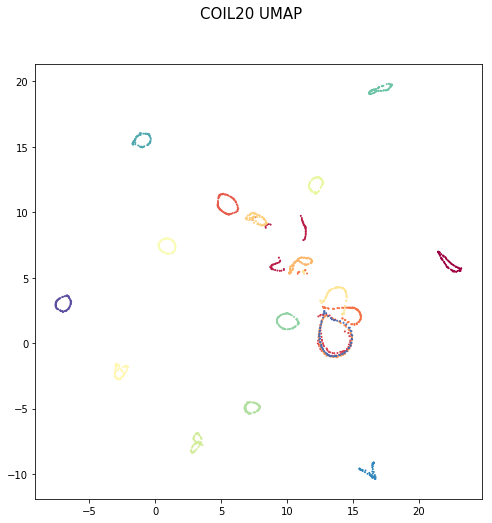

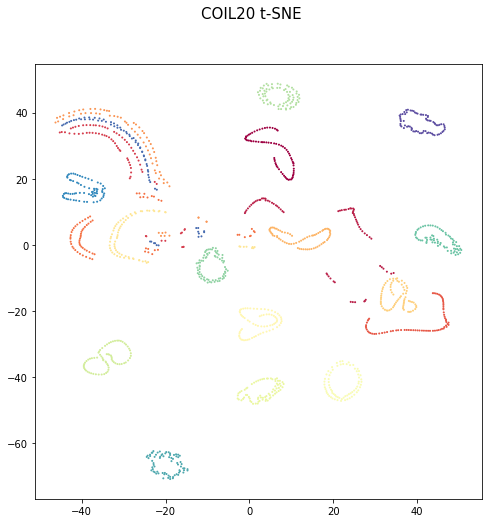

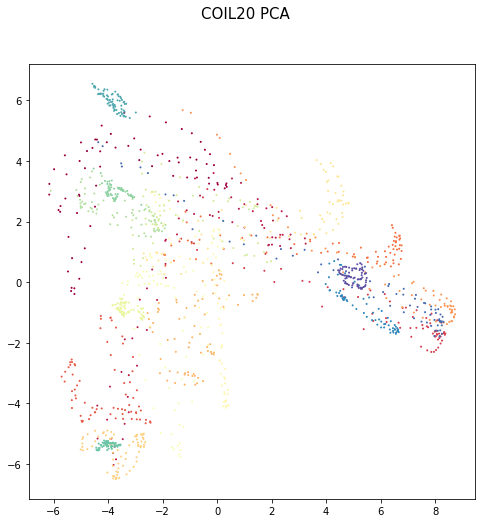

In [5]:
mat = io.loadmat('data/COIL20.mat')

coil20_data = mat['X']
coil20_target = pd.Series(mat['Y'][:,0])
titles = ['COIL20 UMAP', 'COIL20 t-SNE', 'COIL20 PCA']
for i in range(3):
    embedding = algorithms[i].fit_transform(coil20_data)
    make_plot(embedding, coil20_target, titles[i])

### MNIST

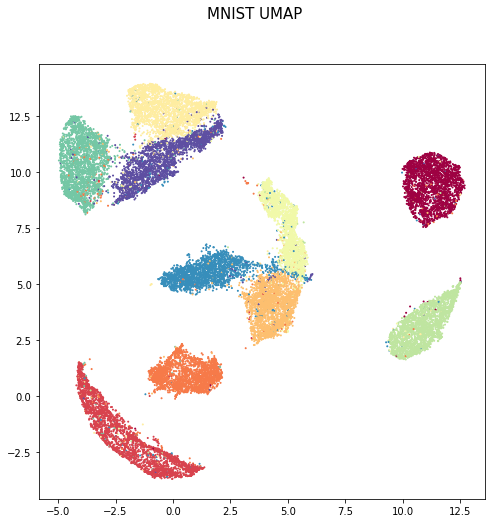

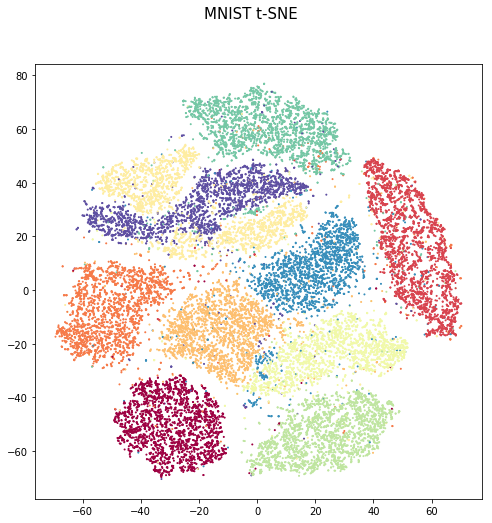

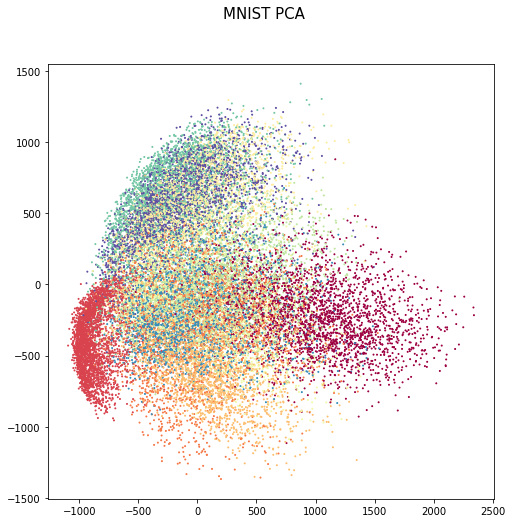

In [6]:
mnist_url = 'https://www.openml.org/data/get_csv/52667/mnist_784.arff'
mnist_data = pd.read_csv(mnist_url)

mnist_data = mnist_data[:25000]
mnist_target = mnist_data['class']
titles = ['MNIST UMAP', 'MNIST t-SNE', 'MNIST PCA']
for i in range(3):
    embedding = algorithms[i].fit_transform(mnist_data)
    make_plot(embedding, mnist_target, titles[i])

### Fashion MNIST

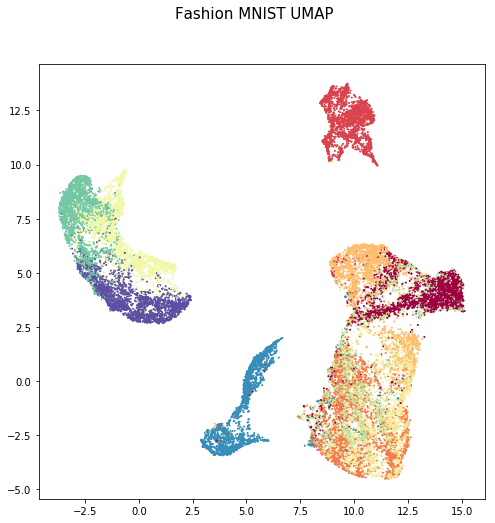

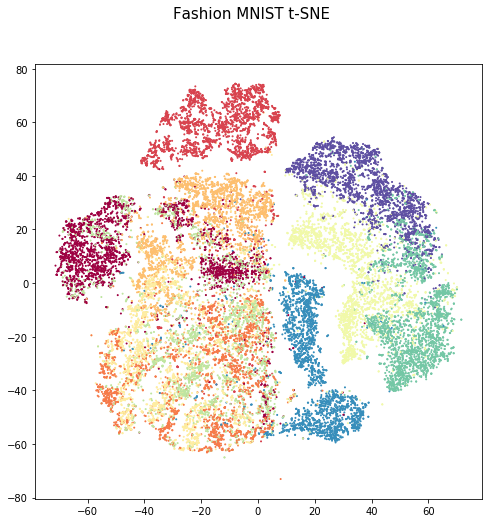

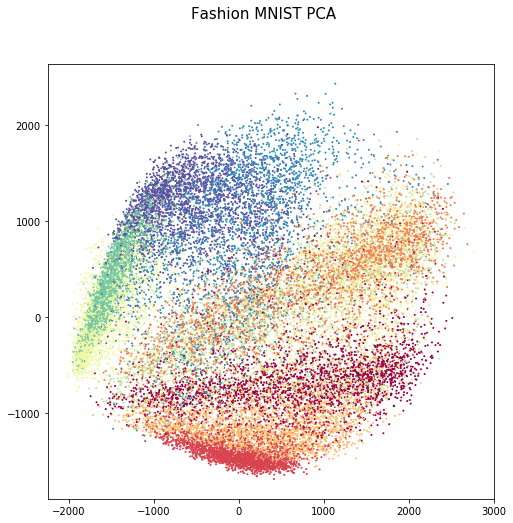

In [7]:
fmnist_data = pd.read_csv('data/f_mnist.csv')

fmnist_data = fmnist_data[:25000]
fmnist_data = fmnist_data.drop('Id', axis=1)
fmnist_target = fmnist_data['Category']
titles = ['Fashion MNIST UMAP', 'Fashion MNIST t-SNE', 'Fashion MNIST PCA']
for i in range(3):
    embedding = algorithms[i].fit_transform(fmnist_data)
    make_plot(embedding, fmnist_target, titles[i])

### Google News

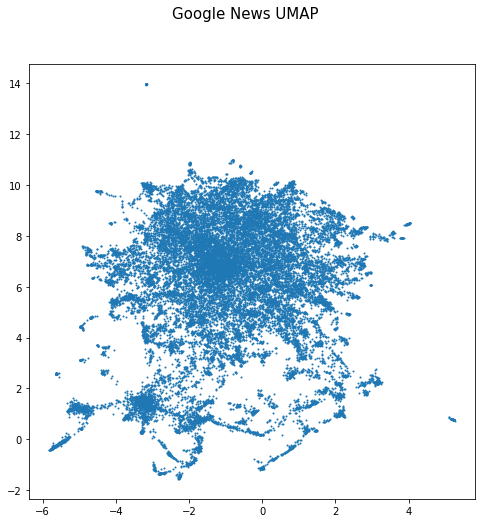

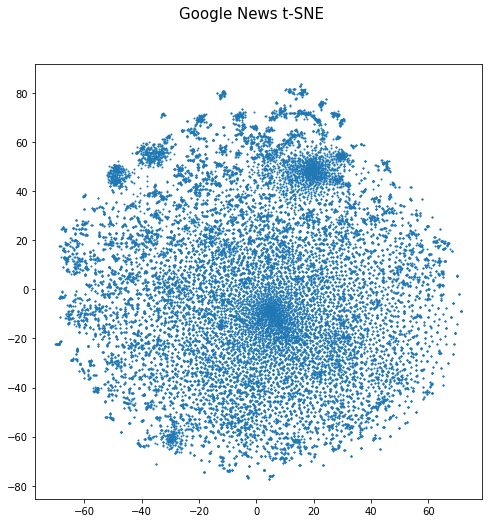

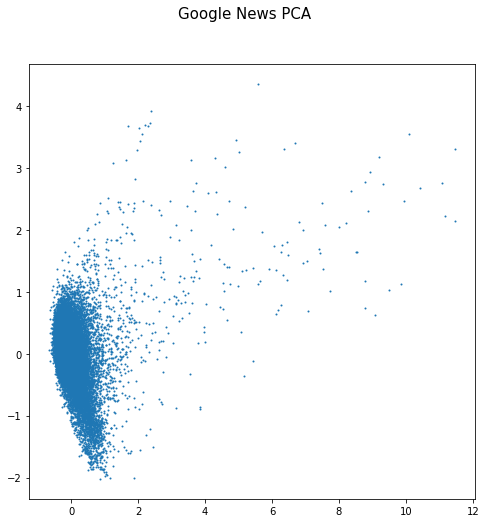

In [8]:
gnews_data = load('word2vec-google-news-300').vectors
gnews_data = gnews_data[:25000]
titles = ['Google News UMAP', 'Google News t-SNE', 'Google News PCA']
for i in range(3):
    embedding = algorithms[i].fit_transform(gnews_data)
    plt.figure(figsize=(8, 8))
    plt.scatter(embedding[:,0], embedding[:,1], cmap='Spectral', s=1)
    plt.suptitle(titles[i], fontsize=15)
    plt.show()